                    Machine Learning Model to detetc if a transaction is a fraud or not

In [43]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('assets/fraud_data.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [3]:
#Amount of observations in the dataset that are considered fraud

len(df[df['Class'] == 1])

356

In [4]:
#Percentage over the total amount of data
len(df[df['Class'] == 1])/len(df)

0.016410823768035772

In [5]:
#Data slipt to train and test ML model

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
#Train of a Dummy Classifier to check against ML model

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
accuracy = dummy_majority.score(X_test, y_test)
print('The accuracy score of the dummy model is: {:.2f}'.format(accuracy))

The accuracy score of the dummy model is: 0.99


In [7]:
y_predict = dummy_majority.predict(X_test)
recall = recall_score(y_test, y_predict)
print('The recall score of the dummy model is: {:.2f}'.format(recall))

The recall score of the dummy model is: 0.00


In [8]:
precision = precision_score(y_test, y_predict)
print('The precision score of the dummy model is: {:.2f}'.format(precision))

The precision score of the dummy model is: 0.00


In [9]:
#Train of a Support Vector Classifier with deafult parameters for the dataset

svm = SVC().fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
accuracy = svm.score(X_test, y_test)
y_predict = svm.predict(X_test)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
print('The scores for the SVC with deafult parameters are: Accuracy: {:.2f}, Recall: {:.2f}, Precision: {:.2f}'.format(accuracy, recall, precision))

The scores for the SVC with deafult parameters are: Accuracy: 0.99, Recall: 0.35, Precision: 0.93


In [67]:
#Fitting of a Logistic Regression Model

model = LogisticRegression().fit(X_train, y_train)
y_predicted = model.predict(X_test)
    
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

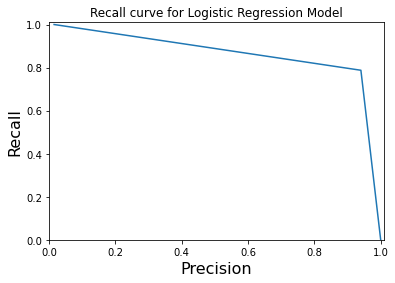

In [64]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.title('Recall curve for Logistic Regression Model')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

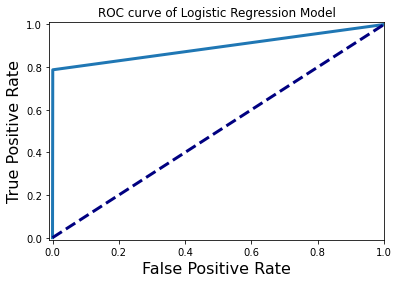

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_predicted)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve of Logistic Regression Model')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

In [44]:
model2 = LogisticRegression(solver='liblinear')
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}

grid = GridSearchCV(model2, param_grid = grid_values, scoring = 'recall', cv = 3)
grid.fit(X_train, y_train)
grid.cv_results_['mean_test_score'].reshape(4,2)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [69]:
grid.best_score_

0.8115942028985508

In [70]:
grid.cv_results_

{'mean_fit_time': array([0.08687107, 0.20477843, 0.18432593, 0.2565732 , 0.22042751,
        0.24939744, 0.30674402, 0.26781988]),
 'std_fit_time': array([0.06725788, 0.02861668, 0.01789365, 0.04362408, 0.01392309,
        0.07849114, 0.18084347, 0.0144087 ]),
 'mean_score_time': array([0.01066446, 0.00524139, 0.0051295 , 0.0377365 , 0.00694434,
        0.0203863 , 0.04710881, 0.00992115]),
 'std_score_time': array([0.0077246 , 0.0009035 , 0.00016723, 0.04574699, 0.0013288 ,
        0.01771135, 0.05113159, 0.00523259]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penalty': 'l1'},
  {'C': 0.01, 'penal

In [71]:
grid.best_params_

{'C': 1, 'penalty': 'l1'}

So, as we're interested in achieve the model with the best recall score, as we're dealing with a fraud and bank transactions. The best score possible was with a Logistic Regression Model with parametres chosen using a grid search. 